In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import collections
from scipy.stats import zscore
#add other imports as needed

In [3]:
import os

In [4]:
import platform

# Set file location based on platform. 
platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/TReND2024/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on Code Ocean
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/TReND2024/"

In [5]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

manifest_file = os.path.join(data_root,'allen-brain-observatory/visual-coding-2p/manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

In [6]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = os.path.join(data_root,'allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json') 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
areas = boc.get_all_targeted_structures()
areas

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [8]:
cre_lines = boc.get_all_cre_lines()
cre_lines

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [9]:
imaging_depths = boc.get_all_imaging_depths()
imaging_depths

[175,
 185,
 195,
 200,
 205,
 225,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [10]:
visual_area = [areas[3]]
cre_line = [cre_lines[1]]
imaging_depth = imaging_depths[:7]

In [11]:
#create an empty dataframe with colums as areas and index as cre_lines
df = pd.DataFrame(columns=areas,index=cre_line)

#populate the dataframe with the number of experiment containers for each combination
for area in areas:
    exps = boc.get_experiment_containers(targeted_structures=[area],cre_lines=cre_line,imaging_depths=imaging_depth)
    df[area].loc[cre_line] = len(exps)

df['Total'] = df.sum(axis=1).astype(int)

#look at dataframe
print(df)

              VISal VISam VISl VISp VISpm VISrl  Total
Emx1-IRES-Cre     2     1    5    3     2     4     17


In [12]:
exps = boc.get_experiment_containers(targeted_structures=visual_area,cre_lines=cre_line,imaging_depths=imaging_depth)
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,517328083,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),237706,Emx1-IRES-Cre;Camk2a-tTA;Ai93-237706,[Epileptiform Events],False
1,536323956,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),252174,Emx1-IRES-Cre;Camk2a-tTA;Ai93(MG)-252174,[],False
2,543677425,175,VISp,Emx1-IRES-Cre,Ai93(TITL-GCaMP6f),260936,Emx1-IRES-Cre;Camk2a-tTA;Ai93-260936,[],False


In [14]:
experiment_container_ids = [exps[1]['id']]

In [15]:
sessions = boc.get_ophys_experiments(experiment_container_ids=experiment_container_ids, stimuli=['natural_scenes'])
sessions

[{'id': 541048140,
  'imaging_depth': 175,
  'targeted_structure': 'VISp',
  'cre_line': 'Emx1-IRES-Cre',
  'reporter_line': 'Ai93(TITL-GCaMP6f)',
  'acquisition_age_days': 121,
  'experiment_container_id': 536323956,
  'session_type': 'three_session_B',
  'donor_name': '252174',
  'specimen_name': 'Emx1-IRES-Cre;Camk2a-tTA;Ai93(MG)-252174',
  'fail_eye_tracking': False}]

In [17]:
session_id = sessions[0]['id']
session_id

541048140

In [18]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

In [19]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)
events.shape

(283, 114111)

In [20]:
stim_table = data_set.get_stimulus_table('natural_scenes')
stim_table.start

0       16122
1       16129
2       16137
3       16144
4       16152
        ...  
5945    96266
5946    96274
5947    96281
5948    96289
5949    96296
Name: start, Length: 5950, dtype: int64

In [21]:
(stim_table.end-stim_table.start != 7).sum()

238

In [22]:
stim_start = stim_table.start.min()
stim_end = stim_table.end.max()+1

In [23]:
stim_table.end = stim_table.end - stim_start
stim_table.start = stim_table.start - stim_start

In [24]:
stim_table


,frame,start,end
0,65,0,7
1,99,7,14
2,98,15,22
3,91,22,29
4,27,30,37
...,...,...,...
5945,-1,80144,80151
5946,54,80152,80159
5947,77,80159,80166
5948,95,80167,80174


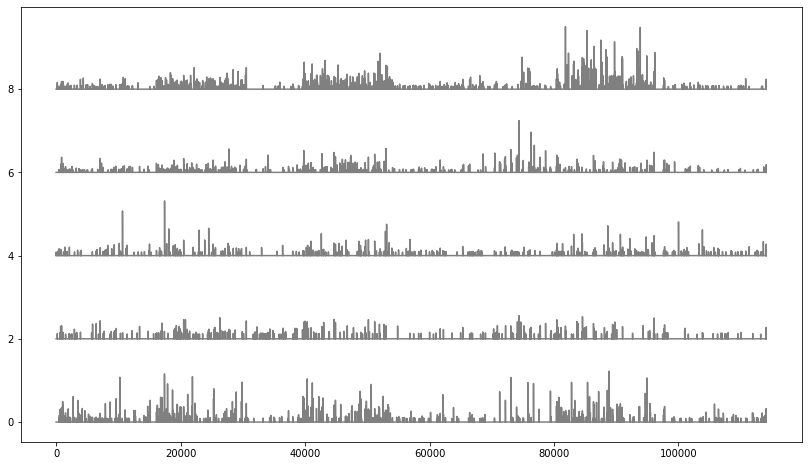

In [25]:
fig = plt.figure(figsize=(14,8))
for i in range(5):
    plt.plot(events[i,:]+(i*2), color='gray')

In [26]:
averaging_indices = stim_table.end.to_numpy()
averaging_indices.shape

(5950,)

In [27]:
cum_events = events.cumsum(axis=1)[:,averaging_indices]
trial_responses = np.c_[cum_events[:,1] ,np.diff(cum_events, axis=1)]/(stim_table.end.to_numpy()-stim_table.start.to_numpy())
trial_responses.shape

(283, 5950)

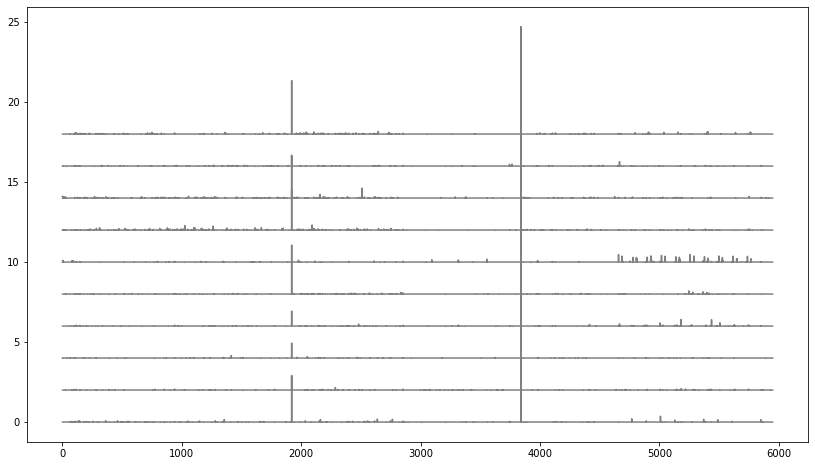

In [28]:
fig = plt.figure(figsize=(14,8))
for i in range(10):
    plt.plot(trial_responses[i,:]+(i*2), color='gray')

In [29]:
neural_data = trial_responses.T

Text(0.5, 1.0, 'Heat map of neural population spike counts')

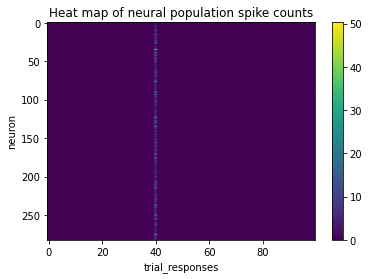

In [30]:
fig = plt.figure()
b = plt.imshow(neural_data[3800:3900,:].T, aspect='auto')
fig.colorbar(b)
# plt.xticks(averaging_indices,averaging_indices)
plt.ylabel('neuron')
plt.xlabel('trial_responses')
plt.title('Heat map of neural population spike counts')

In [31]:
trial_responses_df = pd.DataFrame(trial_responses.mean(axis=0))
print(trial_responses_df.shape)
# Calculate the Z-score for each data point
z_scores = trial_responses_df.apply(zscore)
# Identify rows with any outlier (Z-score > 3 or Z-score < -3)
outliers = (trial_responses_df[(z_scores > 3) | (z_scores < -3)].to_numpy() > 0).nonzero()[0]
outliers

(5950, 1)


array([1920, 3840])

In [32]:
trial_responses = np.delete(trial_responses, outliers, axis=1)
trial_responses.shape

(283, 5948)

In [33]:
frames = stim_table['frame'].to_numpy()
frames = np.delete(frames, outliers)
frames.shape

(5948,)

In [34]:
sorting_indices = np.argsort(frames)
sorted_events = trial_responses[:,sorting_indices]
sorted_events.shape

(283, 5948)

In [35]:
num_trials_per_stim = np.fromiter(collections.Counter(np.sort(frames)).values(), dtype=float)
num_trials_per_stim.shape

(119,)

In [36]:
averaging_indices = num_trials_per_stim.cumsum().astype('int') - 1
averaging_indices.shape

(119,)

In [37]:
cum_trial_responses = sorted_events.cumsum(axis=1)[:,averaging_indices]
stimulus_responses = np.c_[cum_trial_responses[:,1] ,np.diff(cum_trial_responses, axis=1)]/num_trials_per_stim
stimulus_responses.shape

(283, 119)

In [38]:
stimulus_responses = stimulus_responses.T
stimulus_responses.shape

(119, 283)

Text(0.5, 1.0, 'Heat map of neural population spike counts')

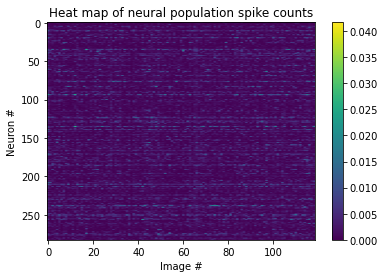

In [39]:
fig = plt.figure()
b = plt.imshow(stimulus_responses.T, aspect='auto')
fig.colorbar(b)
# plt.xticks(averaging_indices,averaging_indices)
plt.ylabel('Neuron #')
plt.xlabel('Image #')
plt.title('Heat map of neural population spike counts')

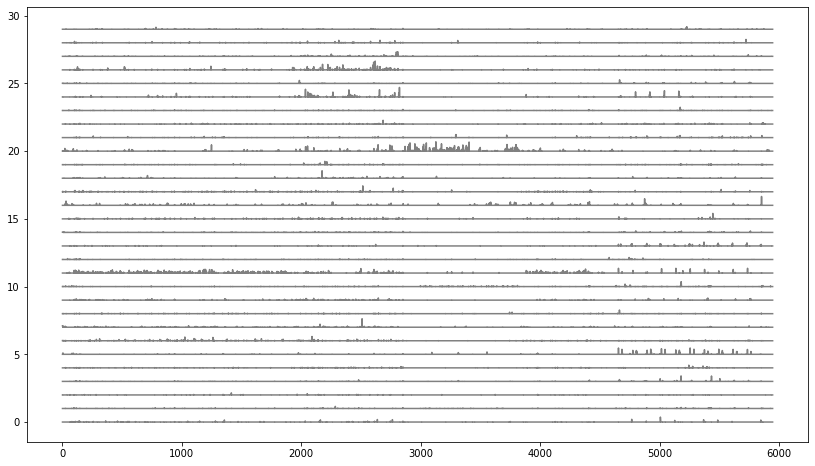

In [42]:
fig = plt.figure(figsize=(14,8))
for i in range(30):
    plt.plot(trial_responses[i,:]+(i), color='gray')

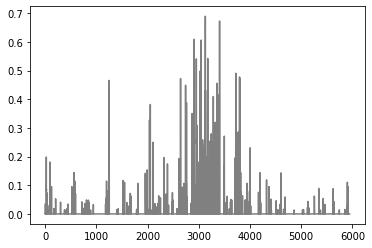

In [43]:
plt.plot(trial_responses[20,:], color='gray')

In [46]:
np.mean(trial_responses[20,:])+np.std(trial_responses[20,:])+np.std(trial_responses[20,:])

0.08530639012606622

In [45]:
np.std(trial_responses[20,:])

0.039489450492321